In [1]:
from typing import NamedTuple
import numpy as np

class SimResult(NamedTuple):
    head_wins: int
    tail_wins: int
        
    def expectation_value(self):
        return (1*self.head_wins + 0*self.tail_wins) / (self.head_wins+self.tail_wins)
    
    def pretty(self):
        print(f'Head Wins: {self.head_wins}')
        print(f'Tail Wins: {self.tail_wins}')
        print(f'<E>      : {self.expectation_value()}')

def sim(max_flips: int, seed: int=42, runs=1_000_000, coin_bias=0.5) -> SimResult:
    """
    Simulates flipping a coin at most max_flips times over `runs` games.
    The winner has >= (max_flips+1)/2 wins.
    Gives how many times Heads wins and how many time Tails wins.
    """
#     assert max_flips % 2 == 1  # max_flips must always be odd, else there can be ties
    rng = np.random.RandomState(seed)
    # each row is a simulation of `max_flips` flips
    flips = rng.uniform(low=0, high=1, size=(runs, max_flips)) > coin_bias
    winners = np.average(flips, axis=1) > 0.5
    head_wins = winners.sum()
    tail_wins = runs-head_wins
    return SimResult(head_wins, tail_wins)


In [2]:
# using a fair coin, best 2 of 3, 1M sims
result = sim(3)
result.pretty()

Head Wins: 499595
Tail Wins: 500405
<E>      : 0.499595


In [3]:
# using a slightly unfair coin towards heads, best 2 of 3, 1M sims
result = sim(3, coin_bias=0.45)
result.pretty()

Head Wins: 574282
Tail Wins: 425718
<E>      : 0.574282


In [4]:
# same slightly unfair coin, but best 50 out of 101
result = sim(101, coin_bias=0.45)
result.pretty()

Head Wins: 843889
Tail Wins: 156111
<E>      : 0.843889


In [5]:
# a fair coin, but best 50 our of 101
result = sim(101)
result.pretty()

Head Wins: 499246
Tail Wins: 500754
<E>      : 0.499246


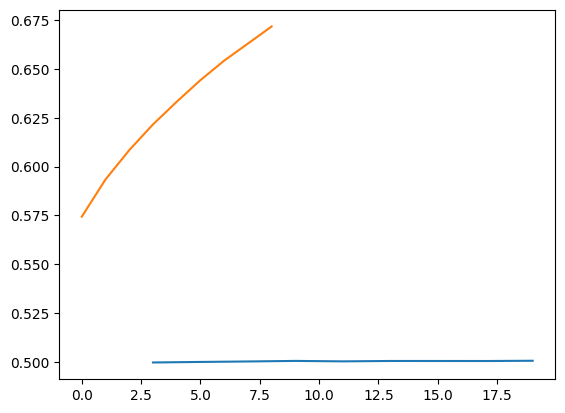

In [6]:
from multiprocessing.pool import ThreadPool

odds = np.arange(start=3, stop=21, step=2)
with ThreadPool() as pool:
    fair_expectations = pool.map(lambda o: sim(o).expectation_value(), odds)
    unfair_expectations = pool.map(lambda o: sim(o, coin_bias=0.45).expectation_value(), odds)
    
import matplotlib.pyplot as plt
plt.plot(odds, fair_expectations, unfair_expectations)